<a href="https://colab.research.google.com/github/kelvinfoo123/Final-Year-Project/blob/main/Mapper_on_Lung_Cancer_Classification_(TensorFlow).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import data**

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 

cancer = pd.read_csv("survey lung cancer.csv")
cancer.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [37]:
cancer.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

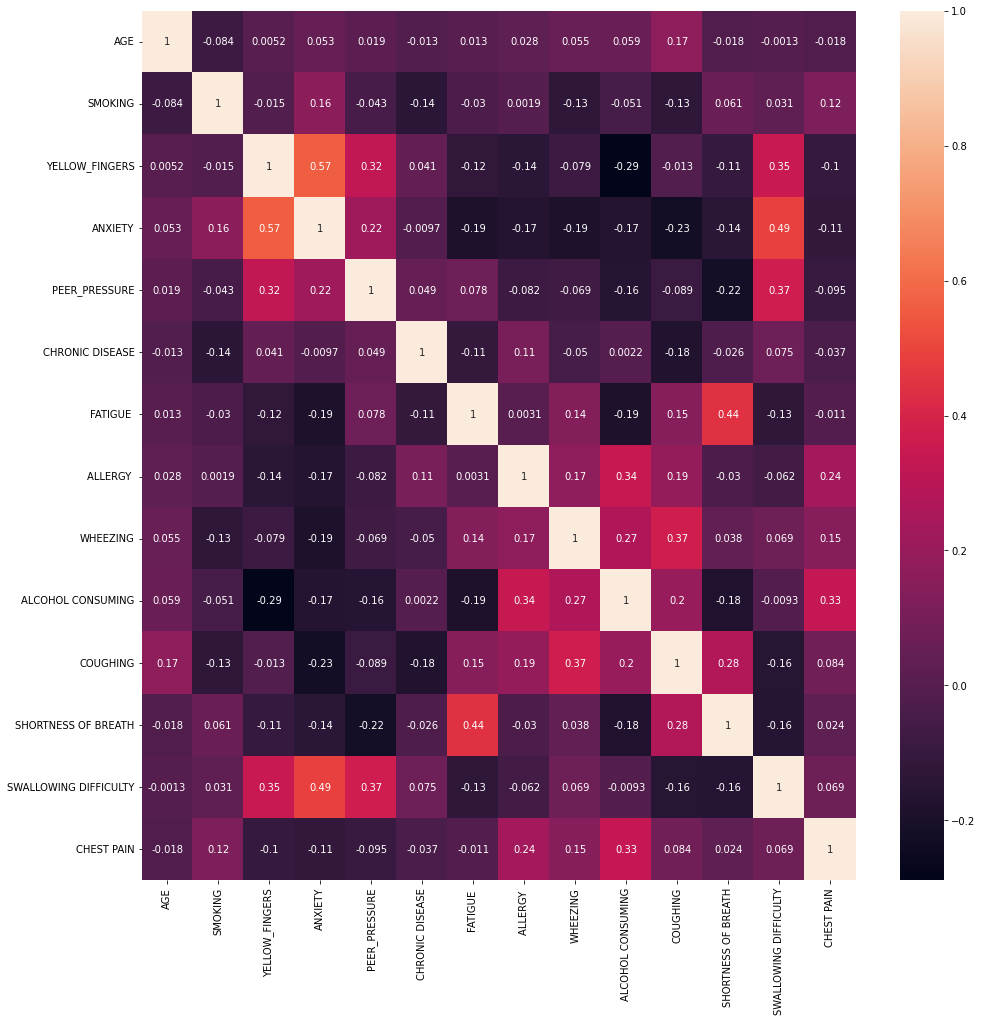

In [2]:
plt.figure(figsize = (16,16))
sns.heatmap(cancer.corr(), annot = True)

## **Data preprocessing**

In [3]:
cancer.duplicated().sum() # There are 33 duplicated samples in the dataset. 

# Drop duplicate
cancer.drop_duplicates(inplace = True)

In [4]:
# Label Encoder 

from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()
cancer["GENDER"] = encoder.fit_transform(cancer["GENDER"])
cancer["LUNG_CANCER"] = encoder.fit_transform(cancer["LUNG_CANCER"])

In [5]:
# Split into X and y 

X = cancer.drop(["LUNG_CANCER"], axis = 1)
y = cancer["LUNG_CANCER"]

In [6]:
X.shape

(276, 15)

In [7]:
# Change 1 and 2 to 0 and 1 

for i in X.columns[2:]: 
  temp = []
  for j in X[i]: 
    temp.append(j - 1)
  X[i] = temp 

X.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0


In [8]:
# Scaling 

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X['AGE'] = scaler.fit_transform(X[['AGE']])

In [9]:
# Oversampling of minority class 
# One way to deal with imbalanced data is to oversample, meaning to add more copies to the minority class.
# RandomOverSampler generates new samples by randomly sampling with replacement of the currently available samples. 

from imblearn.over_sampling import RandomOverSampler 
X, y = RandomOverSampler().fit_resample(X,y) 

In [10]:
# Split into training and test set 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
X_test.shape 

(143, 15)

In [38]:
df_X_test = pd.DataFrame(X_test, columns = ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN'])
df_X_test['LUNG_CANCER'] = pd.Series(y_test)
df_X_test.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
467,1,0.728176,1,0,0,0,0,0,1,1,1,1,0,0,1,0
33,0,0.489060,1,1,1,0,1,0,0,0,0,0,1,1,1,1
131,1,0.967291,1,1,1,0,1,0,1,1,1,1,0,1,1,1
72,1,0.489060,0,0,0,0,1,1,1,1,1,1,1,0,1,1
78,1,0.489060,1,1,1,1,1,0,0,0,1,0,0,1,1,1


## **Neural network**

In [11]:
!pip install tensorflow 

import tensorflow.keras 
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.layers import Dense, Dropout 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
model = Sequential()
model.add(Dense(128, input_dim = 15, activation = 'relu'))
model.add(Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

In [13]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [14]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50, batch_size = 64)

Epoch 1/50
6/6 [==============================] - 4s 91ms/step - loss: 1.4963 - accuracy: 0.5586 - val_loss: 1.4212 - val_accuracy: 0.5105
Epoch 2/50
6/6 [==============================] - 0s 17ms/step - loss: 1.3910 - accuracy: 0.6306 - val_loss: 1.3237 - val_accuracy: 0.6993
Epoch 3/50
6/6 [==============================] - 0s 32ms/step - loss: 1.3039 - accuracy: 0.6667 - val_loss: 1.2330 - val_accuracy: 0.7273
Epoch 4/50
6/6 [==============================] - 0s 13ms/step - loss: 1.2303 - accuracy: 0.6997 - val_loss: 1.1496 - val_accuracy: 0.7273
Epoch 5/50
6/6 [==============================] - 0s 12ms/step - loss: 1.1305 - accuracy: 0.7477 - val_loss: 1.0667 - val_accuracy: 0.7413
Epoch 6/50
6/6 [==============================] - 0s 17ms/step - loss: 1.0799 - accuracy: 0.7508 - val_loss: 0.9877 - val_accuracy: 0.8042
Epoch 7/50
6/6 [==============================] - 0s 17ms/step - loss: 0.9756 - accuracy: 0.8408 - val_loss: 0.9161 - val_accuracy: 0.8392
Epoch 8/50
6/6 [===========

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2048      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,417
Trainable params: 12,417
Non-trainable params: 0
_________________________________________________________________


In [15]:
y_pred=model.predict(X_test)
y_pred =(y_pred > 0.5)

5/5 [==============================] - 0s 2ms/step


Text(33.0, 0.5, 'Predicted')

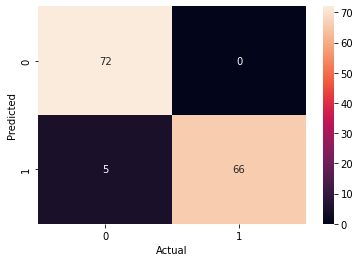

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
plt.xlabel("Actual")
plt.ylabel("Predicted")

## **Extract weights**

In [16]:
from keras.models import Model 

layer_name_0 = 'dense'
layer_name_1 = 'dense_1'
layer_name_2 = 'dense_2'
layer_name_3 = 'dense_3'

# Visualize the output of each layer 
intermediate_layer_model_0 = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name_0).output)
intermediate_layer_model_1 = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name_1).output)
intermediate_layer_model_2 = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name_2).output)
intermediate_layer_model_3 = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name_3).output)

intermediate_output_0 = intermediate_layer_model_0.predict(X_test)
intermediate_output_1 = intermediate_layer_model_1.predict(X_test)
intermediate_output_2 = intermediate_layer_model_2.predict(X_test)
intermediate_output_3 = intermediate_layer_model_3.predict(X_test)

5/5 [==============================] - 0s 3ms/step


In [ ]:
intermediate_output_0.shape

(143, 128)

In [ ]:
intermediate_output_1.shape

(143, 64)

In [ ]:
intermediate_output_2.shape

(143, 32)

In [ ]:
intermediate_output_3.shape

(143, 1)

## **Mapper algorithm**

When applying the mapper algorithm, the node ID is the ID of the original data and not the ID of the weights. 

In [17]:
!pip install giotto-tda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 92.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.1/526.1 KB 57.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.6/452.6 KB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 83.8 MB/s eta 0:00:00


In [18]:
import gtda.graphs as gr
from gtda.pipeline import Pipeline
from gtda.plotting import plot_point_cloud, plot_heatmap
from gtda.graphs import KNeighborsGraph, GraphGeodesicDistance
from gtda.mapper import (
    CubicalCover,
    OneDimensionalCover,
    make_mapper_pipeline,
    Projection,
    plot_static_mapper_graph,
    plot_interactive_mapper_graph)
from gtda.mapper import Eccentricity, Entropy
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA

In [19]:
filter_func = Eccentricity(metric = 'euclidean')
cover = CubicalCover(n_intervals = 40, overlap_frac = 0.5)
clusterer = DBSCAN(eps = 20, min_samples = 5, metric = 'euclidean') 
pipe_mapper = make_mapper_pipeline(filter_func = filter_func, cover = cover, clusterer = clusterer, verbose = False, n_jobs = 1)

In [20]:
plotly_params = {"node_trace": {"marker_colorscale": "RdBu"}}
fig = plot_static_mapper_graph(pipe_mapper,
                               intermediate_output_0, 
                               layout='fruchterman_reingold',
                               node_scale =20,
                               plotly_params=plotly_params)
fig.show(config={'scrollZoom': True})

In [21]:
plotly_params = {"node_trace": {"marker_colorscale": "RdBu"}}
fig = plot_static_mapper_graph(pipe_mapper,
                               intermediate_output_1, 
                               layout='fruchterman_reingold',
                               node_scale =20,
                               plotly_params=plotly_params)
fig.show(config={'scrollZoom': True})

In [22]:
plotly_params = {"node_trace": {"marker_colorscale": "RdBu"}}
fig = plot_static_mapper_graph(pipe_mapper,
                               intermediate_output_2, 
                               layout='fruchterman_reingold',
                               node_scale =20,
                               plotly_params=plotly_params)
fig.show(config={'scrollZoom': True})

In [23]:
plotly_params = {"node_trace": {"marker_colorscale": "RdBu"}}
fig = plot_static_mapper_graph(pipe_mapper,
                               intermediate_output_3, 
                               layout='fruchterman_reingold',
                               node_scale =20,
                               plotly_params=plotly_params)
fig.show(config={'scrollZoom': True})

In [24]:
filter_func = Eccentricity(metric = 'euclidean')
cover = CubicalCover(n_intervals = 40, overlap_frac = 0.6)
clusterer = DBSCAN(eps = 20, min_samples = 5, metric = 'euclidean') 
pipe_mapper = make_mapper_pipeline(filter_func = filter_func, cover = cover, clusterer = clusterer, verbose = False, n_jobs = 1)

In [25]:
plotly_params = {"node_trace": {"marker_colorscale": "RdBu"}}
fig = plot_static_mapper_graph(pipe_mapper,
                               intermediate_output_0, 
                               layout='fruchterman_reingold',
                               node_scale =20,
                               plotly_params=plotly_params)
fig.show(config={'scrollZoom': True})

In [26]:
plotly_params = {"node_trace": {"marker_colorscale": "RdBu"}}
fig = plot_static_mapper_graph(pipe_mapper,
                               intermediate_output_1, 
                               layout='fruchterman_reingold',
                               node_scale =20,
                               plotly_params=plotly_params)
fig.show(config={'scrollZoom': True})

In [27]:
plotly_params = {"node_trace": {"marker_colorscale": "RdBu"}}
fig = plot_static_mapper_graph(pipe_mapper,
                               intermediate_output_2, 
                               layout='fruchterman_reingold',
                               node_scale =20,
                               plotly_params=plotly_params)
fig.show(config={'scrollZoom': True})

In [28]:
plotly_params = {"node_trace": {"marker_colorscale": "RdBu"}}
fig = plot_static_mapper_graph(pipe_mapper,
                               intermediate_output_3, 
                               layout='fruchterman_reingold',
                               node_scale =20,
                               plotly_params=plotly_params)
fig.show(config={'scrollZoom': True})

## **Focusing on no loops**
**Study the last layer to see how well the segmentation is**

In [29]:
filter_func = Eccentricity(metric = 'euclidean')
cover = CubicalCover(n_intervals = 40, overlap_frac = 0.5)
clusterer = DBSCAN(eps = 20, min_samples = 5, metric = 'euclidean') 
pipe_mapper = make_mapper_pipeline(filter_func = filter_func, cover = cover, clusterer = clusterer, verbose = False, n_jobs = 1)

In [31]:
plotly_params = {"node_trace": {"marker_colorscale": "RdBu"}}
fig = plot_static_mapper_graph(pipe_mapper,
                               intermediate_output_3, 
                               layout='fruchterman_reingold',
                               node_scale =20,
                               plotly_params=plotly_params)
fig.show(config={'scrollZoom': True})

In [32]:
graph = pipe_mapper.fit_transform(intermediate_output_3)
node_elements = graph.vs['node_elements']

node_1 = []
node_2 = []
node_3 = []
node_4 = []

for node_id in [0, 1, 21, 23, 18, 19, 20, 16, 15, 6, 7, 12, 2, 3, 4, 10, 11]: 
  if node_id in [0, 1, 21]: 
    node_1.append(node_elements[node_id])
  if node_id in [23, 18, 19]: 
    node_3.append(node_elements[node_id])
  if node_id in [20, 16, 15]:
    node_4.append(node_elements[node_id])
  else: 
    node_2.append(node_elements[node_id])

In [33]:
node_1

[array([  0,  69, 119, 138]), array([  0,  69, 138]), array([119])]

In [34]:
node_2

[array([  0,  69, 119, 138]),
 array([  0,  69, 138]),
 array([119]),
 array([142]),
 array([ 71, 142]),
 array([71]),
 array([ 10,  29,  38,  54,  68, 104, 115]),
 array([ 10,  29,  38,  40,  54,  56,  68,  81, 104, 115]),
 array([ 20,  40,  56,  81,  89, 106, 137]),
 array([  1,   4,   5,   6,  17,  20,  26,  61,  62,  66,  86,  89,  92,
         96, 106, 108, 109, 110, 113, 117, 118, 123, 133, 134, 136, 137]),
 array([  1,   2,   3,   4,   5,   6,   8,   9,  14,  17,  19,  21,  22,
         24,  26,  27,  33,  34,  36,  42,  44,  49,  51,  53,  55,  59,
         60,  61,  62,  63,  66,  75,  85,  86,  88,  91,  92,  93,  96,
         97, 101, 102, 103, 107, 108, 109, 110, 111, 112, 113, 114, 116,
        117, 118, 121, 123, 124, 128, 130, 133, 134, 135, 136, 141]),
 array([  2,   3,   8,   9,  14,  19,  21,  22,  24,  27,  33,  34,  36,
         42,  44,  46,  49,  51,  53,  55,  57,  59,  60,  63,  65,  67,
         75,  83,  85,  88,  91,  93,  97, 101, 102, 103, 107, 111, 112,
  

In [35]:
node_3

[array([142]), array([ 71, 142]), array([71])]

In [36]:
node_4

[array([ 74,  79, 131]), array([ 31,  74,  79, 131]), array([31])]

In [45]:
df_1 = df_X_test.iloc[[0,  69, 119, 138]]
df_3 = df_X_test.iloc[[142, 71]]
df_4 = df_X_test.iloc[[74, 79, 131, 31]]

In [52]:
node_2_new = [0,  69, 119, 138, 71, 142, 10,  29,  38,  54,  68, 104, 115, 10,  29,  38,  40,  54,  56,  68,  81, 104, 115, 20,  40,  56,  81,  89, 106, 137, 
              1,   4,   5,   6,  17,  20,  26,  61,  62,  66,  86,  89,  92, 96, 106, 108, 109, 110, 113, 117, 118, 123, 133, 134, 136, 137, 
              1,   2,   3,   4,   5,   6,   8,   9,  14,  17,  19,  21,  22, 24,  26,  27,  33,  34,  36,  42,  44,  49,  51,  53,  55,  59, 60,  61,  62,  63,  66,  75,  85,  86,  88,  91,  92,  93,  96,
              97, 101, 102, 103, 107, 108, 109, 110, 111, 112, 113, 114, 116, 117, 118, 121, 123, 124, 128, 130, 133, 134, 135, 136, 141, 2,   3,   8,   9,  14,  19,  21,  22,  24,  27,  33,  34,  36,
              42,  44,  46,  49,  51,  53,  55,  57,  59,  60,  63,  65,  67, 75,  83,  85,  88,  91,  93,  97, 101, 102, 103, 107, 111, 112, 114, 116, 121, 124, 126, 128, 130, 135, 141, 13,  15,  23,  43,  46,  57,  65,  67,  70,  83,  87,  90,  98,
              100, 125, 126, 132,  13,  15,  16,  23,  35,  43,  48,  50,  52,  70,  72,  73,  84, 87,  90,  98,  99, 100, 125, 132]

In [55]:
id_list = []
row  = []

for id in node_2_new: 
  if id in id_list: 
    id_list.append(id)
  else: 
    row.append(id)
    id_list.append(id)

In [58]:
np.transpose(row)

array([  0,  69, 119, 138,  71, 142,  10,  29,  38,  54,  68, 104, 115,
        40,  56,  81,  20,  89, 106, 137,   1,   4,   5,   6,  17,  26,
        61,  62,  66,  86,  92,  96, 108, 109, 110, 113, 117, 118, 123,
       133, 134, 136,   2,   3,   8,   9,  14,  19,  21,  22,  24,  27,
        33,  34,  36,  42,  44,  49,  51,  53,  55,  59,  60,  63,  75,
        85,  88,  91,  93,  97, 101, 102, 103, 107, 111, 112, 114, 116,
       121, 124, 128, 130, 135, 141,  46,  57,  65,  67,  83, 126,  13,
        15,  23,  43,  70,  87,  90,  98, 100, 125, 132,  16,  35,  48,
        50,  52,  72,  73,  84,  99])

In [61]:
df_2 = df_X_test.iloc[[ 0,  69, 119, 138,  71, 142,  10,  29,  38,  54,  68, 104, 115,
        40,  56,  81,  20,  89, 106, 137,   1,   4,   5,   6,  17,  26,
        61,  62,  66,  86,  92,  96, 108, 109, 110, 113, 117, 118, 123,
       133, 134, 136,   2,   3,   8,   9,  14,  19,  21,  22,  24,  27,
        33,  34,  36,  42,  44,  49,  51,  53,  55,  59,  60,  63,  75,
        85,  88,  91,  93,  97, 101, 102, 103, 107, 111, 112, 114, 116,
       121, 124, 128, 130, 135, 141,  46,  57,  65,  67,  83, 126,  13,
        15,  23,  43,  70,  87,  90,  98, 100, 125, 132,  16,  35,  48,
        50,  52,  72,  73,  84,  99]]
df_2

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
467,1,0.728176,1,0,0,0,0,0,1,1,1,1,0,0,1,0
403,1,0.728176,1,0,0,0,0,0,1,1,1,1,0,0,1,0
424,0,0.130387,1,1,0,1,1,0,0,0,0,0,0,0,0,0
341,1,0.728176,1,0,0,0,0,0,1,1,1,1,0,0,1,0
471,0,-0.467401,1,0,0,0,1,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,0,0.847734,1,0,0,0,0,1,0,0,0,0,1,0,0,0
460,0,0.847734,1,0,0,0,0,1,0,0,0,0,1,0,0,0
331,0,-0.586959,0,0,0,0,0,1,0,0,0,0,1,0,0,0
316,0,-0.586959,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [66]:
print(df_1['LUNG_CANCER'].value_counts())
print(df_2['LUNG_CANCER'].value_counts())
print(df_3['LUNG_CANCER'].value_counts())
print(df_4['LUNG_CANCER'].value_counts())

0    4
Name: LUNG_CANCER, dtype: int64
1    66
0    44
Name: LUNG_CANCER, dtype: int64
1    1
0    1
Name: LUNG_CANCER, dtype: int64
0    3
1    1
Name: LUNG_CANCER, dtype: int64


## **Analyzing df_2 and df_4**

<ipython-input-73-a48d90a3d7d8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-73-a48d90a3d7d8>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



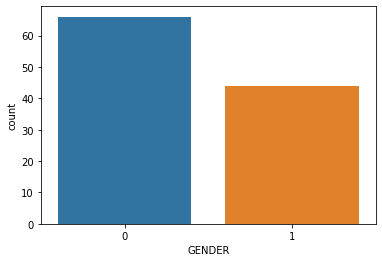

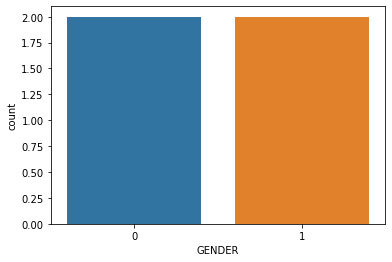

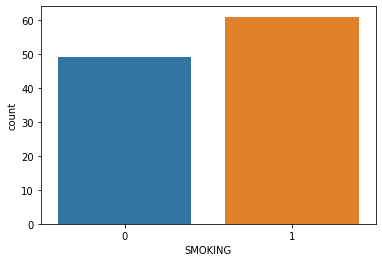

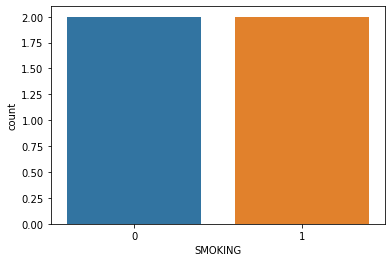

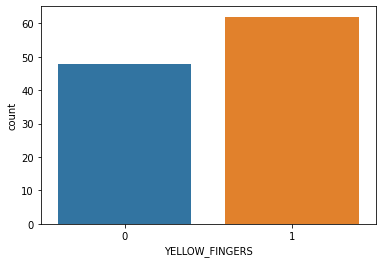

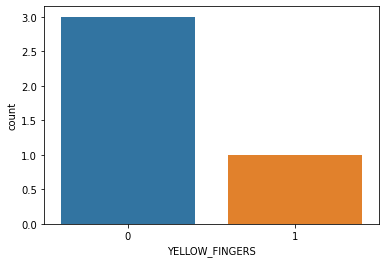

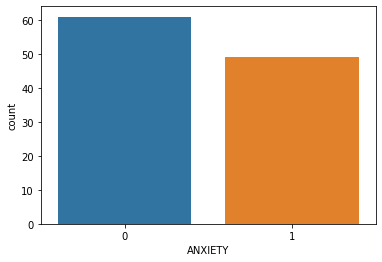

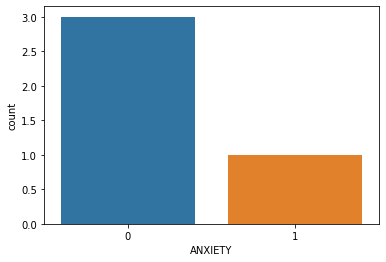

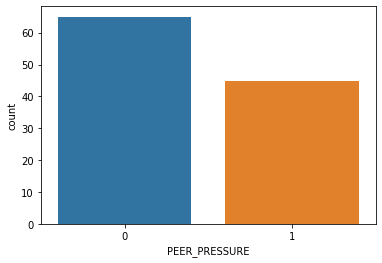

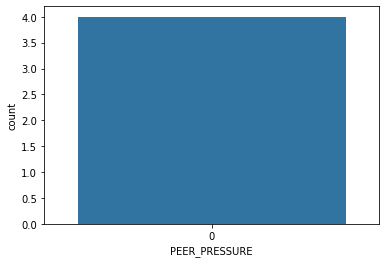

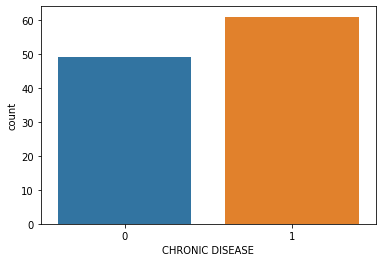

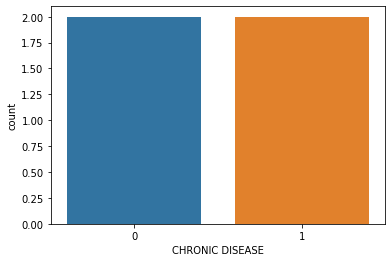

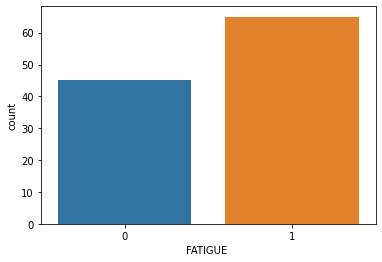

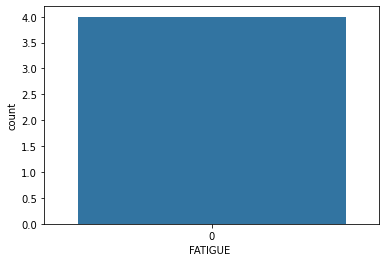

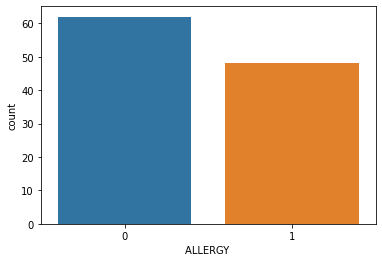

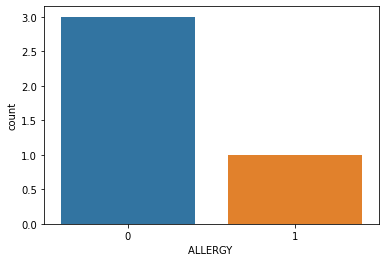

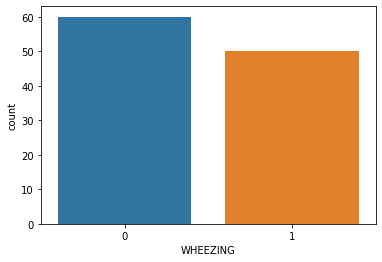

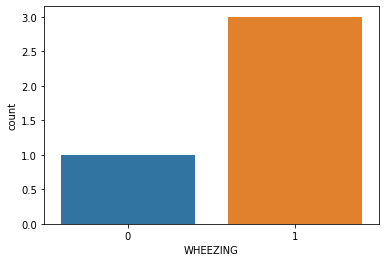

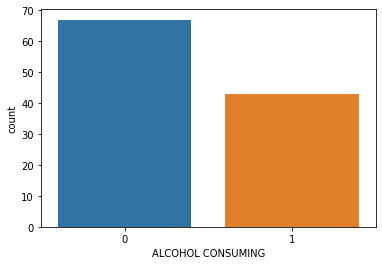

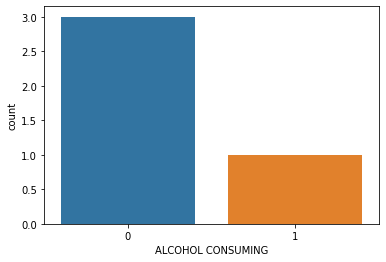

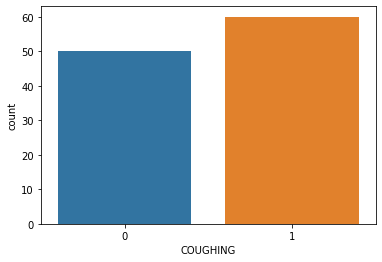

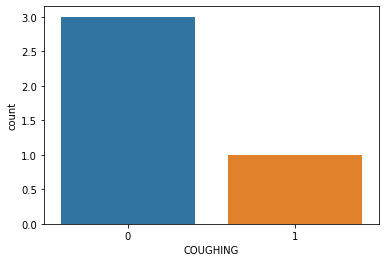

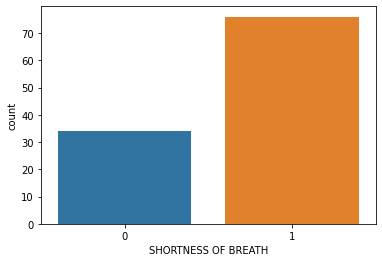

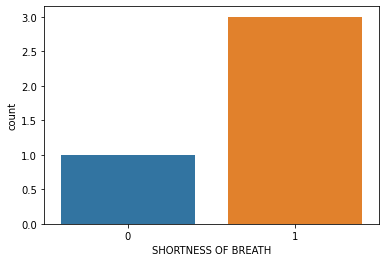

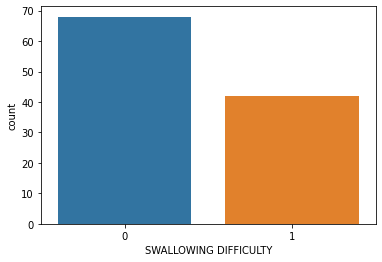

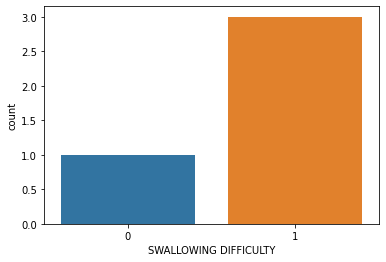

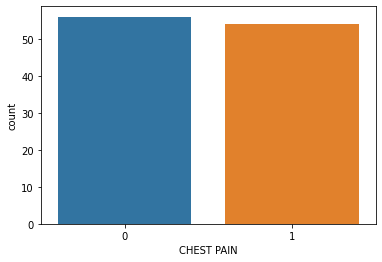

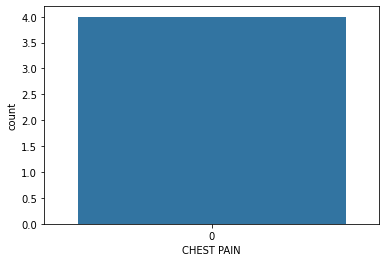

In [73]:
df_2["LUNG_CANCER"] = df_2["LUNG_CANCER"].map({0: 'No', 1:'Yes'})
df_4["LUNG_CANCER"] = df_4["LUNG_CANCER"].map({0: 'No', 1:'Yes'})

for col in ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY','PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']: 
  for data in [df_2, df_4]: 
    sns.countplot(x = col, data = data)
    plt.show()

Factors that are different: peer pressure, fatigue, chest pain